In [1]:
import numpy as np
import pandas as pd

In [2]:
#Reading the file(downloaded from covid19india.org)
df = pd.read_csv('case_time_series_26.csv')
df

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...
448,22 April 2021,2021-04-22,332518,16257424,192311,13641571,2257,186338
449,23 April 2021,2021-04-23,345281,16602705,220541,13862112,2620,188958
450,24 April 2021,2021-04-24,348979,16951684,215801,14077913,2761,191719
451,25 April 2021,2021-04-25,354653,17306337,218624,14296537,2808,194527


In [262]:
#To avoid outliers
pop = df[['Date', 'Daily Confirmed', 'Total Confirmed', 'Daily Deceased', 'Total Deceased']][62:]

In [263]:
pop['CFR'] = (pop['Daily Deceased']/pop['Daily Confirmed'])*100 #Calculating Case Fatality Rate
pop

,Date,Daily Confirmed,Total Confirmed,Daily Deceased,Total Deceased,CFR
62,1 April 2020,424,2059,6,53,1.415094
63,2 April 2020,486,2545,16,69,3.292181
64,3 April 2020,560,3105,14,83,2.500000
65,4 April 2020,579,3684,13,96,2.245250
66,5 April 2020,609,4293,22,118,3.612479
...,...,...,...,...,...,...
448,22 April 2021,332518,16257424,2257,186338,0.678760
449,23 April 2021,345281,16602705,2620,188958,0.758802
450,24 April 2021,348979,16951684,2761,191719,0.791165
451,25 April 2021,354653,17306337,2808,194527,0.791760


In [264]:
df[452:]['Total Deceased']/df[452:]['Total Confirmed']*100

452    1.11932
dtype: float64

In [265]:
pop['CFR'][pop['CFR']>17.5]

138    18.076854
Name: CFR, dtype: float64

In [266]:
pop['CFR'][pop['CFR']>17.5] = float(df[452:]['Total Deceased']/df[452:]['Total Confirmed']*100)

<ipython-input-266-e49300bc8739>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop['CFR'][pop['CFR']>17.5] = float(df[452:]['Total Deceased']/df[452:]['Total Confirmed']*100)


In [267]:
import statistics #Mean and Standard Deviation
print('Population Mean = '+str(statistics.mean(pop['CFR'])))
mu_pop = statistics.mean(pop['CFR'])
#print('Phase1 Standard Deviation = '+str(statistics.stdev(pop['CFR'])))

Population Mean = 1.572668013155459


# Phase 1

In [268]:
df1 = pop[0:183] #extracting from 1st April, 2020 to 30th September, 2020
df1 

,Date,Daily Confirmed,Total Confirmed,Daily Deceased,Total Deceased,CFR
62,1 April 2020,424,2059,6,53,1.415094
63,2 April 2020,486,2545,16,69,3.292181
64,3 April 2020,560,3105,14,83,2.500000
65,4 April 2020,579,3684,13,96,2.245250
66,5 April 2020,609,4293,22,118,3.612479
...,...,...,...,...,...,...
240,26 September 2020,88759,5990589,1124,93950,1.266350
241,27 September 2020,82770,6073359,1040,94990,1.256494
242,28 September 2020,69669,6143028,775,95765,1.112403
243,29 September 2020,80500,6223528,1178,96943,1.463354


In [269]:
import statistics #Mean and Standard Deviation
print('Phase1 Mean = '+str(statistics.mean(df1['CFR'])))
print('Phase1 Standard Deviation = '+str(statistics.stdev(df1['CFR'])))

Phase1 Mean = 2.219044620149545
Phase1 Standard Deviation = 0.9433562605454509


Scatter plot for CFR time series data

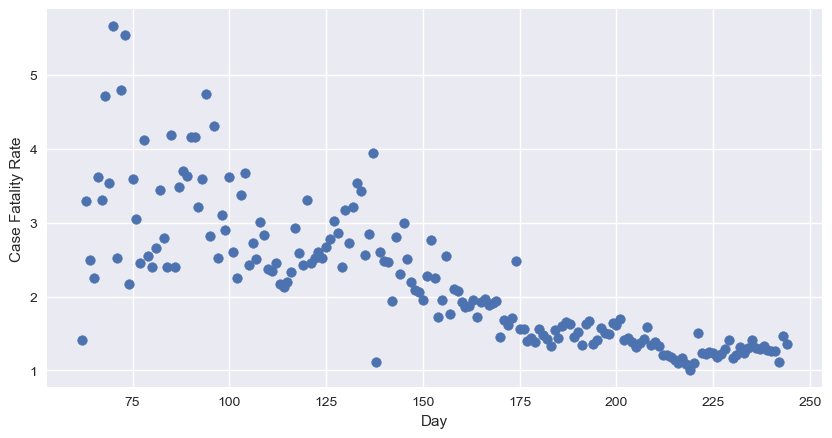

In [270]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.scatter(df1.index, df1['CFR'])
plt.xlabel("Day")
plt.ylabel("Case Fatality Rate")
plt.show()


Histogram

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

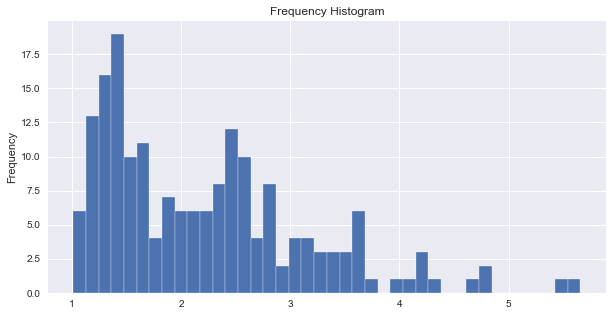

In [271]:
%matplotlib inline
mpl.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.rcParams.update({'figure.figsize':(10, 5), 'figure.dpi':100})

plt.hist(df1['CFR'], bins=40)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

# Phase 2(October - Feb)

In [272]:
df2 = pop[183:306] #Extracting from 1st October, 2020 to 30th January, 2021
df2

,Date,Daily Confirmed,Total Confirmed,Daily Deceased,Total Deceased,CFR
245,1 October 2020,81784,6392060,1099,99221,1.343784
246,2 October 2020,79883,6471943,1068,100289,1.336955
247,3 October 2020,75479,6547422,937,101226,1.241405
248,4 October 2020,74770,6622192,903,102129,1.207704
249,5 October 2020,60130,6682322,886,103015,1.473474
...,...,...,...,...,...,...
363,27 January 2021,11556,10701985,123,153294,1.064382
364,28 January 2021,18912,10720897,162,153456,0.856599
365,29 January 2021,13054,10733951,137,153593,1.049487
366,30 January 2021,13073,10747024,128,153721,0.979117


In [273]:
print('Phase2 mean = '+str(statistics.mean(df2['CFR'])))
print('Phase2 Standard Deviation = '+str(statistics.stdev(df2['CFR'])))

Phase2 mean = 1.2505906979835721
Phase2 Standard Deviation = 0.16804018629363066


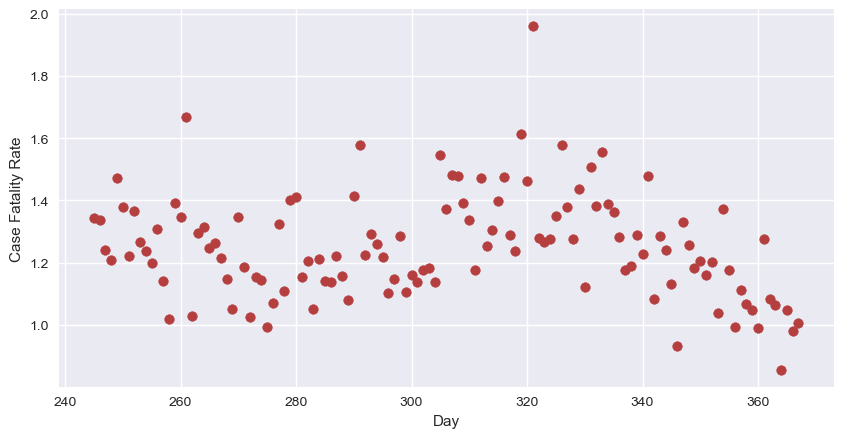

In [274]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(df2.index, df2['CFR'], c='#b53f3f')
plt.xlabel("Day")
plt.ylabel("Case Fatality Rate")
plt.show()

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

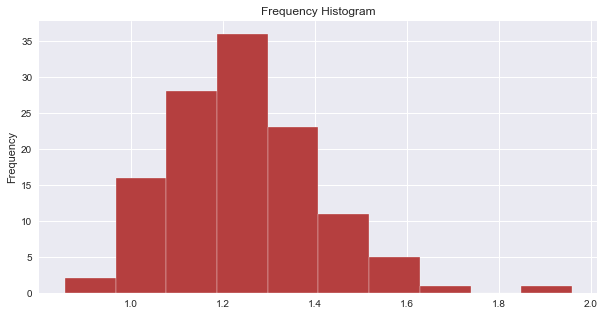

In [275]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.rcParams.update({'figure.figsize':(10, 5), 'figure.dpi':100})

plt.hist(df2['CFR'], bins=10, color = "#b53f3f")
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

# Phase 3 (Feb - till Date)

In [276]:
df3 = pop[306:] #Extracting from 1st February, 2021 till date
df3

,Date,Daily Confirmed,Total Confirmed,Daily Deceased,Total Deceased,CFR
368,1 February 2021,8579,10767130,94,153931,1.095699
369,2 February 2021,11001,10778131,113,154044,1.027179
370,3 February 2021,12925,10791056,107,154151,0.827853
371,4 February 2021,12401,10803457,120,154271,0.967664
372,5 February 2021,11711,10815168,95,154366,0.811203
...,...,...,...,...,...,...
448,22 April 2021,332518,16257424,2257,186338,0.678760
449,23 April 2021,345281,16602705,2620,188958,0.758802
450,24 April 2021,348979,16951684,2761,191719,0.791165
451,25 April 2021,354653,17306337,2808,194527,0.791760


In [277]:
print('Phase3 mean = '+str(statistics.mean(df3['CFR'])))
print('Phase3 Standard Deviation = '+str(statistics.stdev(df3['CFR'])))

Phase3 mean = 0.647122021228687
Phase3 Standard Deviation = 0.15373410238013988


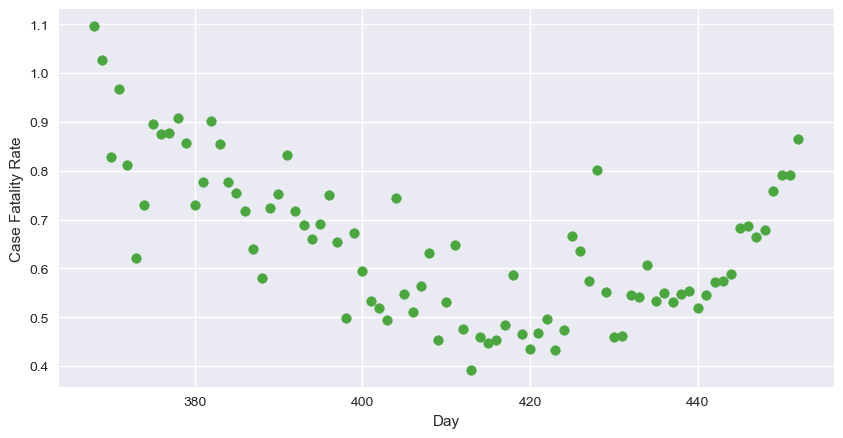

In [278]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(df3.index, df3['CFR'], c='#4ba63f')
plt.xlabel("Day")
plt.ylabel("Case Fatality Rate")
plt.show()

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

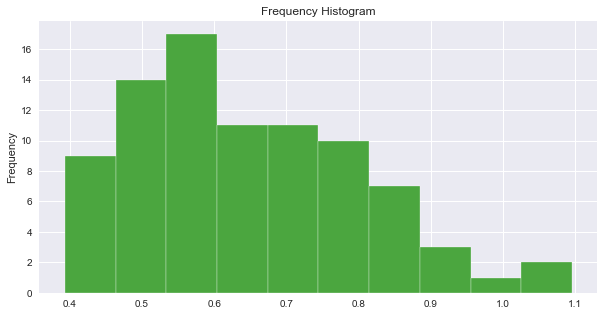

In [279]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.rcParams.update({'figure.figsize':(10, 5), 'figure.dpi':100})

plt.hist(df3['CFR'], bins=10, color = "#4ba63f")
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

# z - test

Testing Phase 1 against the Population Mean

In [280]:
#z-test
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest
  
# Generate a random array of 50 numbers having mean 110 and sd 15
# similar to the IQ scores data we assume above
mean_iq = statistics.mean(df1['CFR'])
sd_iq = statistics.stdev(df1['CFR'])/math.sqrt(len(df1['CFR']))
alpha =0.05
null_mean = mu_pop
data = sd_iq*randn(len(df1['CFR']))+mean_iq
# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))
  
# now we perform the test. In this function, we passed data, in value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger
  
ztest_Score, p_value= ztest(data,value = null_mean, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the 
# p-value with alpha, if it is greater than alpha then we do not null hypothesis 
# else we reject it.
  
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

mean=2.22 stdv=0.06
Reject Null Hypothesis


Testing Phase 2 against the Population Mean

In [281]:
mean_iq = statistics.mean(df2['CFR'])
sd_iq = statistics.stdev(df2['CFR'])/math.sqrt(len(df2['CFR']))
alpha =0.05
null_mean = mu_pop
data = sd_iq*randn(len(df2['CFR']))+mean_iq
# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))
  
# now we perform the test. In this function, we passed data, in value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger
  
ztest_Score, p_value= ztest(data,value = null_mean, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the 
# p-value with alpha, if it is greater than alpha then we do not null hypothesis 
# else we reject it.
  
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Accept NUll Hypothesis")

mean=1.25 stdv=0.02
Accept NUll Hypothesis


Testing Phase 3 against the Population Mean

In [282]:
mean_iq = statistics.mean(df3['CFR'])
sd_iq = statistics.stdev(df3['CFR'])/math.sqrt(len(df3['CFR']))
alpha =0.05
null_mean = mu_pop
data = sd_iq*randn(len(df3['CFR']))+mean_iq
# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))
  
# now we perform the test. In this function, we passed data, in value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger
  
ztest_Score, p_value= ztest(data,value = null_mean, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the 
# p-value with alpha, if it is greater than alpha then we do not null hypothesis 
# else we reject it.
  
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Accept NUll Hypothesis")

mean=0.65 stdv=0.02
Accept NUll Hypothesis


# Two Sample z-test

Phase 2 against Phase 1

In [283]:
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval1 = stests.ztest(df2['CFR'], x2=df1['CFR'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.0596471430041298e-29
reject null hypothesis


Phase 3 against Phase 1

In [284]:
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval1 = stests.ztest(df3['CFR'], x2=df1['CFR'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.5493719886176839e-52
reject null hypothesis


Phase 3 against Phase 2

In [285]:
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval1 = stests.ztest(df3['CFR'], x2=df2['CFR'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

4.904906685675696e-153
reject null hypothesis


Visualizing all the Distributions

In [286]:
time1 = pop['CFR'].to_frame()
time2 = df1['CFR'].to_frame()
time3 = df2['CFR'].to_frame()
time4 = df3['CFR'].to_frame()

In [287]:
time1["Data"] = "Overall"
time2["Data"] = "Dawn"
time3["Data"] = "Calm"
time4["Data"] = "Storm"

In [288]:
times = [time1, time2, time3, time4]
allTimes = pd.concat(times)

In [289]:
result = pd.concat(times)
result

,CFR,Data
62,1.415094,Overall
63,3.292181,Overall
64,2.500000,Overall
65,2.245250,Overall
66,3.612479,Overall
...,...,...
448,0.678760,Storm
449,0.758802,Storm
450,0.791165,Storm
451,0.791760,Storm


In [290]:
import seaborn as sns
sns.set_theme(style="whitegrid")

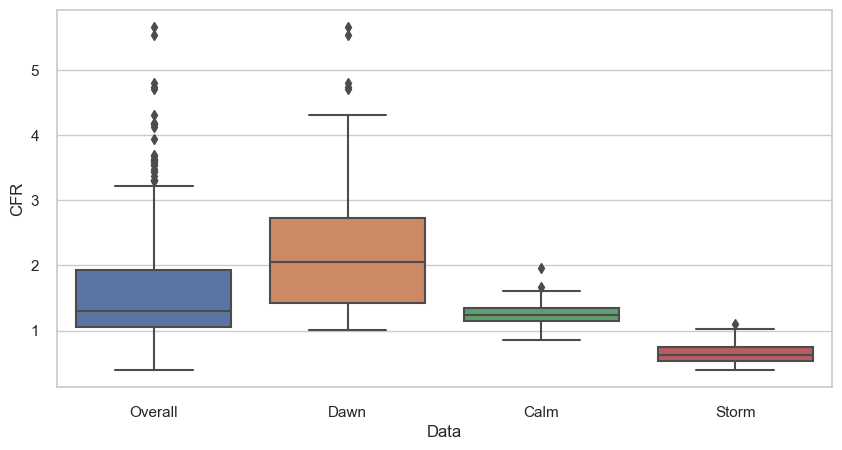

In [291]:
ax = sns.boxplot(x="Data", y="CFR", data=result)

# Analysing Last 4 weeks

In [292]:
last_month = df3['CFR'][-28:] #Extracting last 4 week's data

In [293]:
last_month_data = df3[-28:]

In [294]:
last_month_data = last_month_data.reset_index()
last_month_data

,index,Date,Daily Confirmed,Total Confirmed,Daily Deceased,Total Deceased,CFR
0,425,30 March 2021,53237,12148521,355,161911,0.666829
1,426,31 March 2021,72113,12220634,458,162369,0.635114
2,427,1 April 2021,81398,12302032,468,162837,0.574953
3,428,2 April 2021,89023,12391055,713,163550,0.800917
4,429,3 April 2021,92994,12484049,514,164064,0.552724
5,430,4 April 2021,103794,12587843,477,164541,0.459564
6,431,5 April 2021,96563,12684406,446,164987,0.461875
7,432,6 April 2021,115312,12799718,630,165617,0.546344
8,433,7 April 2021,126276,12925994,684,166301,0.541671
9,434,8 April 2021,131878,13057872,802,167103,0.608138


In [296]:
last_month_data = last_month_data.rename(columns={"level_0": "X"})
last_month_data

,index,Date,Daily Confirmed,Total Confirmed,Daily Deceased,Total Deceased,CFR
0,425,30 March 2021,53237,12148521,355,161911,0.666829
1,426,31 March 2021,72113,12220634,458,162369,0.635114
2,427,1 April 2021,81398,12302032,468,162837,0.574953
3,428,2 April 2021,89023,12391055,713,163550,0.800917
4,429,3 April 2021,92994,12484049,514,164064,0.552724
5,430,4 April 2021,103794,12587843,477,164541,0.459564
6,431,5 April 2021,96563,12684406,446,164987,0.461875
7,432,6 April 2021,115312,12799718,630,165617,0.546344
8,433,7 April 2021,126276,12925994,684,166301,0.541671
9,434,8 April 2021,131878,13057872,802,167103,0.608138


In [149]:
last_month_data.to_csv('last_month.csv')

One Sample T-test (against Population Mean)

In [297]:
from scipy.stats import ttest_1samp
tscore, pvalue = ttest_1samp(last_month, popmean=mu_pop)
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)

t Statistic:  -47.4354621442257
P Value:  1.5252515175502669e-27


Reject Null Hypothesis

# Results

1. Phase 1 vs Population - Reject Null Hypothesis 
2. Phase 2 vs Population - Accept Null Hypothesis
3. Phase 3 vs Population - Accept Null Hypothesis
4. Phase 1 vs Phase 2 - Reject Null Hypothesis
5. Phase 1 vs Phase 3 - Reject Null Hypothesis
6. Phase 2 vs Phase 3 - Reject Null Hypothesis
7. Last 28 days vs Population - Reject Null Hypothesis (t-test)

# SIR Model

In [151]:
from astropy import modeling

In [152]:
x=last_month_data['X']

# Predicting Cases

In [234]:
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D()   # depending on the data you need to give some initial values
fitted_model = fitter(model, x, last_month_data['Daily Confirmed'])

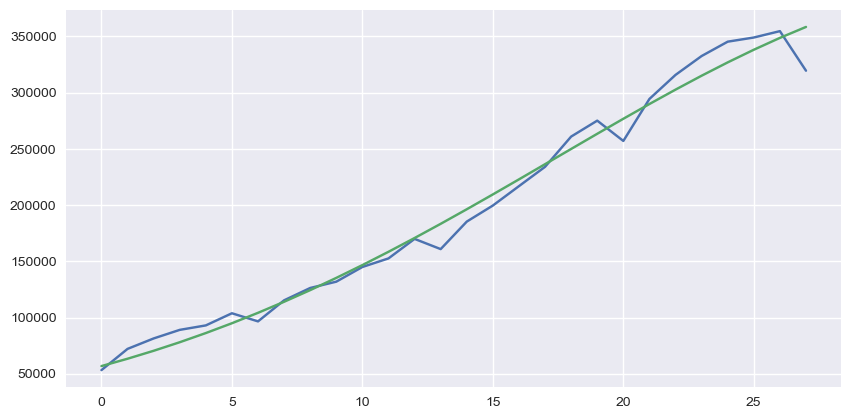

In [235]:
plt.plot(x, last_month_data['Daily Confirmed'])
plt.plot(x, fitted_model(x))

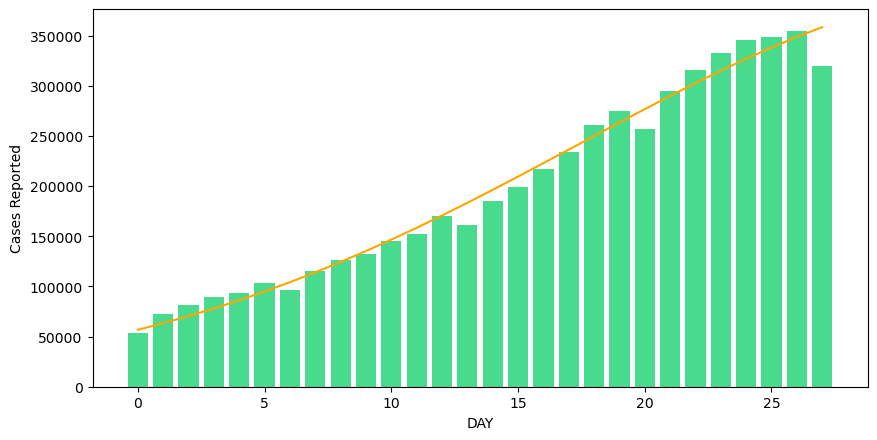

In [155]:
plt.figure(figsize=(10,5))
plt.xlabel('DAY') 
plt.ylabel('Cases Reported') 
plt.bar(x, last_month_data['Daily Confirmed'], color ='#48db8d')
plt.plot(x, fitted_model(x), color ='orange')

In [168]:
fitted_model(x)

array([ 56821.85288019,  63356.90287837,  70422.98048489,  78032.72596459,
        86194.8007986 ,  94913.34439571, 104187.44729961, 114010.6529712 ,
       124370.50081069, 135248.12339799, 146617.9109354 , 158447.25554424,
       170696.38737559, 183318.31343253, 196258.86856664, 209456.88631688,
       222844.4951268 , 236347.54304453, 249886.15132629, 263375.39449046,
       276726.10137453, 289845.76871172, 302639.5757519 , 315011.48559193,
       326865.41624197, 338106.46212396, 348642.14475653, 358383.66989932])

In [236]:
l = [i for i in range(0, 35)]
l = pd.Series(l)

In [237]:
fitted_model(l)

array([ 56821.85288019,  63356.90287837,  70422.98048489,  78032.72596459,
        86194.8007986 ,  94913.34439571, 104187.44729961, 114010.6529712 ,
       124370.50081069, 135248.12339799, 146617.9109354 , 158447.25554424,
       170696.38737559, 183318.31343253, 196258.86856664, 209456.88631688,
       222844.4951268 , 236347.54304453, 249886.15132629, 263375.39449046,
       276726.10137453, 289845.76871172, 302639.5757519 , 315011.48559193,
       326865.41624197, 338106.46212396, 348642.14475653, 358383.66989932,
       367247.16746964, 375154.89015107, 382036.34681742, 387829.34770764,
       392480.9397012 , 395948.21203254, 398198.95530315])

Next week forecasts for Daily Cases

In [240]:
#forecasts
fitted_model(l)[-7:]

array([367247.16746964, 375154.89015107, 382036.34681742, 387829.34770764,
       392480.9397012 , 395948.21203254, 398198.95530315])

# Predicting Deaths

In [241]:
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D()   # depending on the data you need to give some initial values
fitted_model = fitter(model, x, last_month_data['Daily Deceased'])

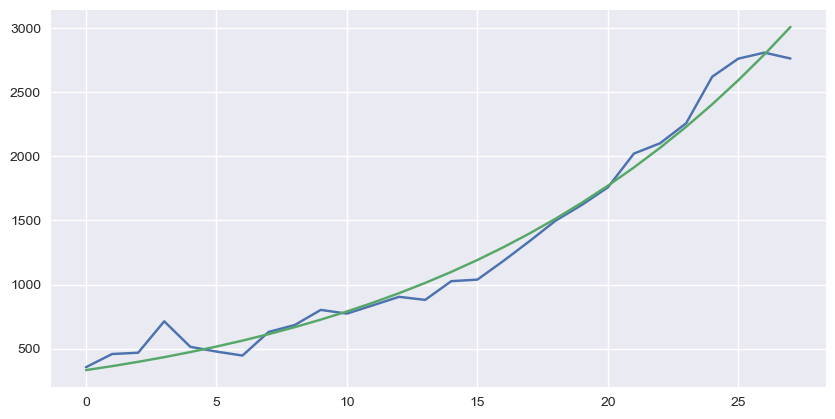

In [242]:
plt.plot(x, last_month_data['Daily Deceased'])
plt.plot(x, fitted_model(x))

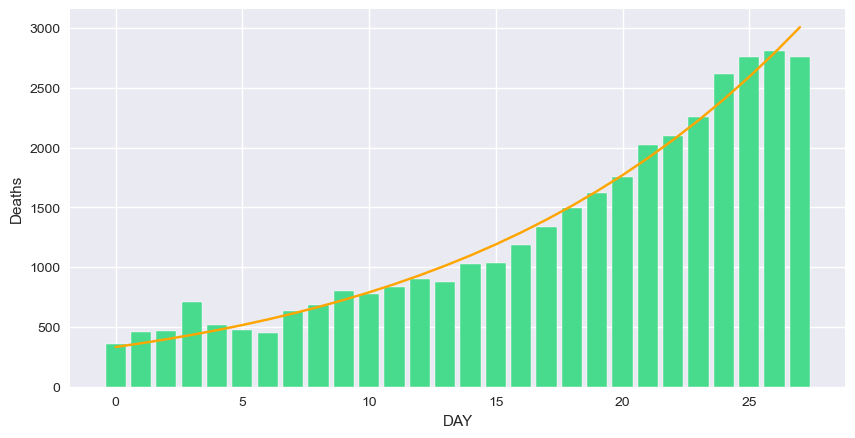

In [243]:
plt.figure(figsize=(10,5))
plt.xlabel('DAY') 
plt.ylabel('Deaths') 
plt.bar(x, last_month_data['Daily Deceased'], color ='#48db8d')
plt.plot(x, fitted_model(x), color ='orange')

Daily Deaths Forecast for next week

In [246]:
fitted_model(l)[-7:]

array([3237.45365609, 3482.09276315, 3743.0382959 , 4021.1971128 ,
       4317.51257585, 4632.96498623, 4968.57194081])